<a href="https://colab.research.google.com/github/poojavelu/AI-tools-for-systems-engineering/blob/main/Tabular%20Data%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 Quick Intro to Tabular Data Processing

In [5]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Key Python Libraries discussed today
* [Numpy](https://numpy.org/doc/stable/user/quickstart.html)
* [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* [scikit-learn](https://scikit-learn.org/stable/)

In [6]:
import numpy as np

#### Reference:

Numpy Quick Start: https://numpy.org/doc/stable/user/quickstart.html

Linear Algebra Operations: https://numpy.org/doc/stable/reference/routines.linalg.html

### Pandas

In [7]:
import pandas as pd

#### Load tips_mdata.csv

In [36]:
indata = pd.read_csv("/content/tips_mdata.csv")

In [9]:
indata.shape

(248, 7)

The dataset contains 248 rows and 7 columns

#### What type of object is indata?

In [10]:
type(indata)

pandas.core.frame.DataFrame

The object indata is confirmed to be a pandas.DataFrame

#### How big is the dataset? Print top 7 and bottom 3 rows of the dataset??

In [37]:
indata.shape
indata.head(7)
indata.tail(3)

(248, 7)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
5,25.29,4.71,Male,No,Sun,Dinner,4.0
6,8.77,2.00,Male,No,Sun,Dinner,2.0


,total_bill,tip,sex,smoker,day,time,size
245,24.27,2.03,Male,Yes,Sat,Dinner,2.0
246,40.17,4.73,Male,Yes,Fri,Dinner,4.0
247,27.28,4.00,Male,Yes,Fri,Dinner,2.0


The dataset contains 248 rows and 7 columns, based on the shape of the dataset. Here are the results for the top 7 and bottom 3 rows.

#### Print the 3rd to 5th row

In [12]:
indata.iloc[2:5]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


Printed the 3rd to 5th rows of the dataset

#### How many rows satisfy the condition, group size is more than 2 and tips is less than $3

In [13]:
numrows = indata[(indata['size'] > 2) & (indata['tip'] < 3)].shape[0]
print("Number of rows that satisfy the condition are: " + str(numrows))

Number of rows that satisfy the condition are: 22


#### Check for missing and duplicate values
Reference: .isnull(), .duplicated(), .drop_duplicates()

In [14]:
# Print missing values by each column
indata.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,6
day,0
time,0
size,3


Here, we are trying to see if there are missing values for any column. Output indicates that there are some missing values in the smoker (6 missing) and size (3 missing) columns. All other columns do not have any missing values.

In [15]:
# Print the rows that are duplicated
indata[indata.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.00,2.00,Female,Yes,Thur,Lunch,2.0
244,38.73,3.00,Male,Yes,Sat,Dinner,4.0
245,24.27,2.03,Male,Yes,Sat,Dinner,2.0
246,40.17,4.73,Male,Yes,Fri,Dinner,4.0
247,27.28,4.00,Male,Yes,Fri,Dinner,2.0


The output shows that rows with index 202, 244, 245, 246, and 247 are duplicates

#### Drop the duplicated rows

In [16]:
clndata = indata.drop_duplicates()
print("Number of duplicate rows dropped: " + str(indata.shape[0] - clndata.shape[0]))

Number of duplicate rows dropped: 5


#### Drop the rows with missing values

In [17]:
startnum = clndata.shape[0]
clndata = clndata.dropna()
endnum = clndata.shape[0]
print("Number of rows with missing values dropped: " + str(startnum-endnum))

Number of rows with missing values dropped: 9


#### How many and what type of columns or features are in the dataset? How many numeric, categorical or boolean?

In [18]:
clndata.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,float64


The dataset contains 7 columns.

total_bill: Numeric (float64)

tip: Numeric (float64)

sex: Categorical (object)

smoker: Categorical (object)

day: Categorical (object)

time: Categorical (object)

size: Numeric (float64)

**3 numeric columns: total_bill, tip, size**

**4 categorical columns: sex, smoker, day, time**

**There are no boolean columns in this dataset.**

#### Compute the summary statistics

In [19]:
clndata.describe()

,total_bill,tip,size
count,234.000000,234.000000,234.000000
mean,19.894188,2.995342,2.589744
std,8.802868,1.345233,0.941680
min,5.750000,1.000000,1.000000
25%,13.420000,2.000000,2.000000
50%,17.855000,2.960000,2.000000
75%,24.222500,3.540000,3.000000
max,50.810000,10.000000,6.000000


Printed summary statistics for the numeric columns in the dataset

#### Compute the counts distribution for categorical variables

In [20]:
clndata["day"].value_counts(normalize = True)
clndata["time"].value_counts()
clndata["sex"].value_counts()
clndata["smoker"].value_counts()

pd.crosstab(clndata.day, clndata.time)

,proportion
day,
Sat,0.354701
Sun,0.307692
Thur,0.256410
Fri,0.081197


,count
time,
Dinner,168
Lunch,66


,count
sex,
Male,151
Female,83


,count
smoker,
No,143
Yes,91


time,Dinner,Lunch
day,,
Fri,12,7
Sat,83,0
Sun,72,0
Thur,1,59


Dinner is more common than Lunch, especially on Saturday and Sunday.

The dataset has a higher proportion of males (151) compared to females (83).

A higher number of people in the dataset do not smoke (143), while 91 smoke.



#### Create a new column percent_tip

In [21]:
clndata["percent_tip"] = clndata["tip"] *100 / clndata["total_bill"]
clndata.shape
clndata.head()

(234, 8)

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2.0,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.680765


The new column percent_tip has been successfully created in the dataset. This column represents the percentage of the tip relative to the total bill.

#### Summary statistics for a numeric variable group by a categorical variable

In [22]:
clndata["percent_tip"].count()
clndata[["percent_tip", "time", "day"]].groupby(["time", "day"]).count()

np.int64(234)

percent_tip
time   day              
Dinner Fri            12
       Sat            83
       Sun            72
       Thur            1
Lunch  Fri             7
       Thur           59

The result shows that there are 234 non-null values in the percent_tip column.

Grouped the percent_tip column by both time and day and printed the results

#### Basic visualizations , scatter, histogram, boxplot

array([[<Axes: title={'center': 'percent_tip'}>]], dtype=object)

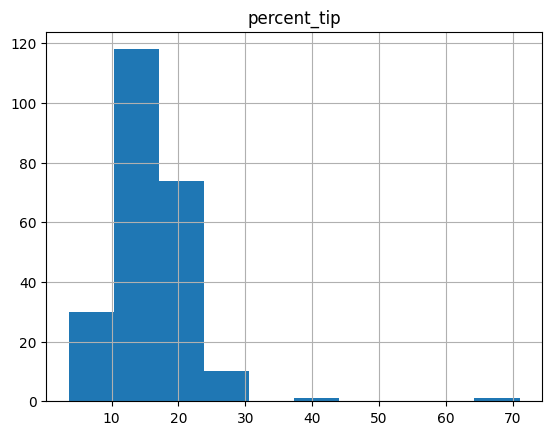

In [23]:
clndata[["percent_tip"]].hist()

The histogram shows how the percent_tip values are distributed, with the x-axis representing the percentage of tips (ranging from 0 to 70) and the y-axis representing the frequency (number of occurrences) of each range of values.

Most of the data points are clustered between 0% and 20%, indicating that the majority of tips are small percentages relative to the total bill.

The histogram suggests that there is a positive skew, with fewer values extending towards higher percentages of the total bill (in the range of 30% to 70%).

#### Include your observations here ....


<Axes: >

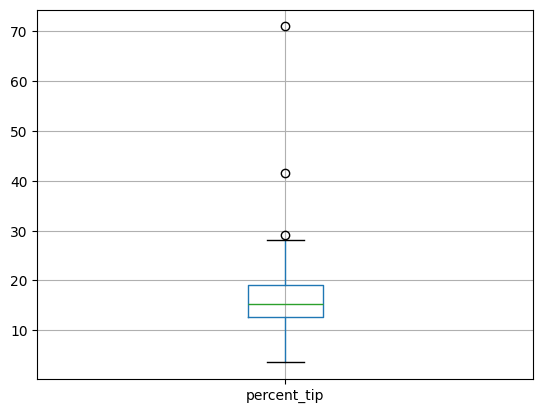

In [24]:
clndata[["percent_tip"]].boxplot()

The middle 50% of the data (from the 25th to 75th percentile) is concentrated between approximately 10% and 30%.

The plot shows several outliers above 30%, suggesting a few data points with significantly higher tip percentages.

#### Include your observations here ....

<Axes: xlabel='total_bill', ylabel='tip'>

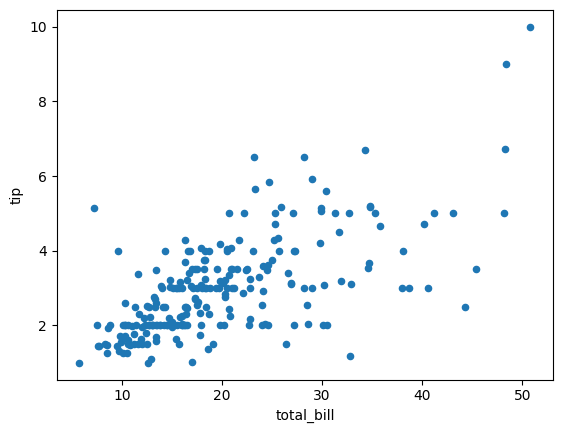

In [25]:
clndata.plot.scatter(x="total_bill", y="tip")

1.There seems to be a positive correlation between the total bill and the tip. As the total bill increases, the tip also tends to increase. This indicates that higher total bills are generally associated with higher tip amounts.

2.Most of the data points are concentrated in the lower range of both axes (low total bill and low tip amounts), which is expected for a majority of the transactions.

3.There are a few outliers at the higher end of the total bill scale, where the tip amount increases disproportionately. These outliers could represent exceptional tipping behavior or higher-value transactions.

#### Include your observations here ....

### scikit-learn

#### Include a blurb at the end (before the reference) about what is being accomplished in this section

In [26]:
import numpy as np
from sklearn import preprocessing

In [27]:
type(clndata[["percent_tip"]])
type(clndata["percent_tip"])

pandas.core.frame.DataFrame

pandas.core.series.Series

#### Rescaling a feature array
##### MinMaxScaler $x_{i}' = \frac{x_i - min(x)}{max(x) - min(x)}$


(array([ 30, 118,  74,  10,   0,   1,   0,   0,   0,   1]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

(array([ 30., 118.,  74.,  10.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

<function matplotlib.pyplot.show(close=None, block=None)>

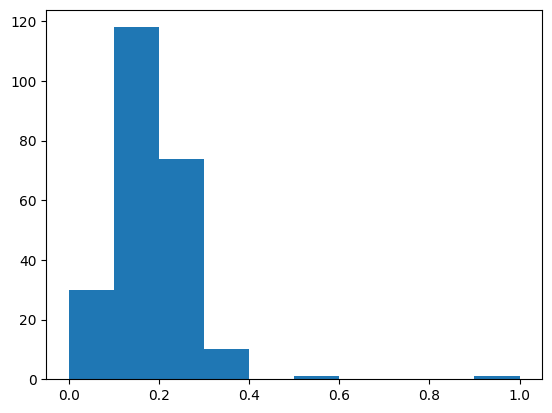

In [28]:
# Creating scaler, either for (0,1) or (-1,1)
minmaxscale = preprocessing.MinMaxScaler(feature_range=(0,1))

# Scaling feature
scaled_feature = minmaxscale.fit_transform(clndata[["percent_tip"]])

# show feature
np.histogram(scaled_feature)

import matplotlib.pyplot as plt
plt.hist(scaled_feature)
plt.show

##### StandardScaler $x_{i}' = \frac{x_i - \bar x}{\sigma}$

array([[-1.64539750e+00],
       [ 1.22172123e-02],
       [ 1.11347181e-01],
       [-3.28196148e-01],
       [-2.12973107e-01],
       [ 4.33578327e-01],
       [ 1.11913038e+00],
       [-7.16943426e-01],
       [-4.83328853e-01],
       [ 9.63172123e-01],
       [ 1.09986955e-01],
       [-2.95020224e-01],
       [ 4.88881589e-02],
       [ 7.18906668e-01],
       [ 3.06382858e-02],
       [ 1.11416078e+00],
       [ 7.61620693e-01],
       [ 3.98622035e-02],
       [ 1.11303740e+00],
       [-3.97810644e-01],
       [-3.01513410e-01],
       [ 1.06170636e-02],
       [-4.65821970e-01],
       [-1.67374315e-01],
       [-3.59425238e-02],
       [ 6.28977955e-01],
       [-1.16821470e-01],
       [-1.30583078e-01],
       [-3.86250433e-01],
       [ 6.46137112e-01],
       [-6.78521789e-01],
       [-1.66762657e-01],
       [-6.09500775e-01],
       [ 3.53157588e-01],
       [-5.93573932e-01],
       [ 1.65908599e-03],
       [-3.30320046e-01],
       [-2.34817894e-01],
       [ 9.7

(array([ 30., 118.,  74.,  10.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([-2.03577822, -0.92948675,  0.17680473,  1.28309621,  2.38938769,
         3.49567916,  4.60197064,  5.70826212,  6.81455359,  7.92084507,
         9.02713655]),
 <BarContainer object of 10 artists>)

<function matplotlib.pyplot.show(close=None, block=None)>

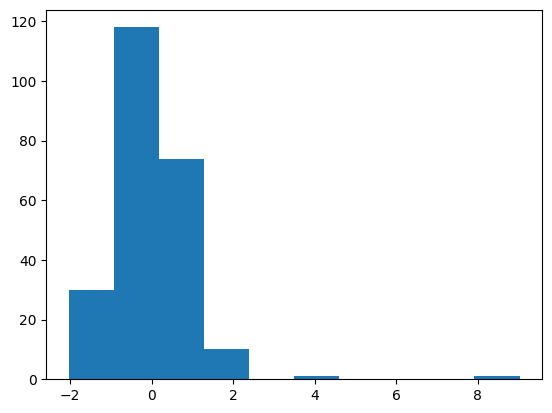

In [29]:
# Creating scaler, either for (0,1) or (-1,1)
stdscaler = preprocessing.StandardScaler()

# Scaling feature
scaled_feature = stdscaler.fit_transform(clndata[["percent_tip"]])

# show feature
scaled_feature

import matplotlib.pyplot as plt
plt.hist(scaled_feature)
plt.show

##### RobustScaler $x_{i}' = \frac{x_i - median(x)}{np.percentile(x, 75) - np.percentile(x, 25)}$

#### Normalizing Observations
Eucledian Norm, L2 norm ${||x||}_2 = \sqrt{x_1^2 + x_2^2 + x_3^2 ...+ x_n^2}$
Manhattan Norm, L1 norm ${||x||}_1 = \Sigma_{i=1}^n {|x_i|}$


array([[-1.48077343e+00],
       [ 1.06616320e-01],
       [ 2.01546641e-01],
       [-2.19375404e-01],
       [-1.09033796e-01],
       [ 5.10126441e-01],
       [ 1.16663503e+00],
       [-5.91653377e-01],
       [-3.67935901e-01],
       [ 1.01728396e+00],
       [ 2.00244041e-01],
       [-1.87604980e-01],
       [ 1.41733699e-01],
       [ 7.83366827e-01],
       [ 1.24256983e-01],
       [ 1.16187597e+00],
       [ 8.24271269e-01],
       [ 1.33090129e-01],
       [ 1.16080018e+00],
       [-2.86040677e-01],
       [-1.93823082e-01],
       [ 1.05083962e-01],
       [-3.51170699e-01],
       [-6.53668000e-02],
       [ 6.04968745e-02],
       [ 6.97247951e-01],
       [-1.69556294e-02],
       [-3.01342259e-02],
       [-2.74970216e-01],
       [ 7.13680159e-01],
       [-5.54859475e-01],
       [-6.47810548e-02],
       [-4.88762541e-01],
       [ 4.33112733e-01],
       [-4.73510440e-01],
       [ 9.65054894e-02],
       [-2.21409323e-01],
       [-1.29953126e-01],
       [ 1.0

(array([ 30., 118.,  74.,  10.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([-1.85461564, -0.79519228,  0.26423108,  1.32365444,  2.3830778 ,
         3.44250116,  4.50192452,  5.56134788,  6.62077124,  7.6801946 ,
         8.73961796]),
 <BarContainer object of 10 artists>)

<function matplotlib.pyplot.show(close=None, block=None)>

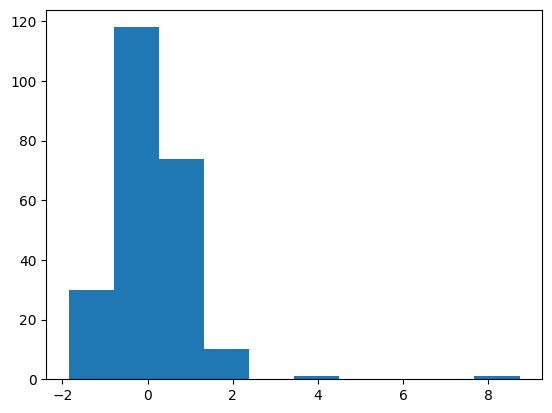

In [30]:
from sklearn.preprocessing import RobustScaler

# Create the scaler
scaler = RobustScaler()

# Apply the scaler to the feature (for example, 'percent_tip' column)
scaled_feature = scaler.fit_transform(clndata[["percent_tip"]])

# Show the scaled feature
scaled_feature

import matplotlib.pyplot as plt
plt.hist(scaled_feature)
plt.show

#### Custom Tranformation for features

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

,percent_tip
0,1.937975
1,2.836394
2,2.871231
3,2.706585
4,2.752435
...,...
239,3.063050
240,2.123261
241,2.284648
242,2.381436


array([[<Axes: title={'center': 'percent_tip'}>]], dtype=object)

array([[<Axes: title={'center': 'percent_tip'}>]], dtype=object)

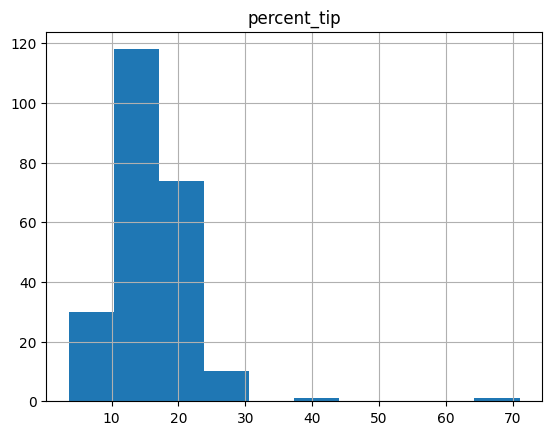

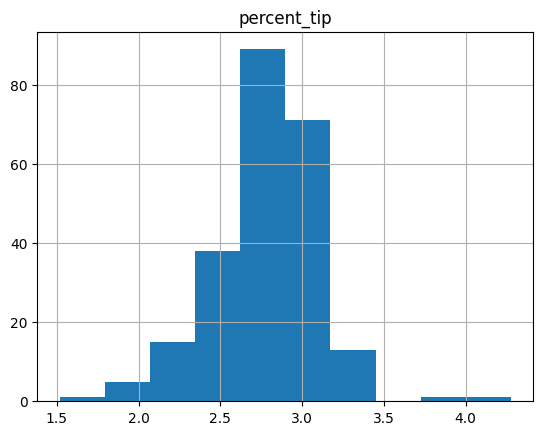

In [32]:
# define a function
def aone_log(x):
    return np.log(x + 1)

# create transformer
log_shift_by_one = FunctionTransformer(aone_log)

# Transform  feature matrix
log_shift_by_one.transform(clndata[["percent_tip"]])

clndata[["percent_tip"]].hist()
log_shift_by_one.transform(clndata[["percent_tip"]]).hist()

### Transform Numeric to Categorical features , discretizing
#### Binarize

In [33]:
from sklearn.preprocessing import binarize

# Create binary
binarize(clndata[["percent_tip"]],threshold=20)

# Create bins
np.digitize(clndata[["percent_tip"]], bins=[10, 20, 30]) # defaults o left edge of each bin

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
    

### Transform Categoical to Boolean variables (Or creating Dummy variables)
Encoding Nominal Categorical features
Encoding Ordinal Categorical features


In [34]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer


# Create one-hot encoder
one_hot = LabelBinarizer()

# One-hot encode feature
one_hot.fit_transform(clndata[["time"]])
# View feature classes
one_hot.classes_
# Reverse one-hot encoding
one_hot.inverse_transform(one_hot.transform(clndata[["time"]]))

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

array(['Dinner', 'Lunch'], dtype='<U6')

array(['Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Lunch', 'Lunch', 'Lunch',
       'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch',
       'Lunch', 'Lunch', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner

In [35]:
# Load library
import pandas as pd


# Create mapper
scale_mapper = {"Thur":1,
                "Fri":2,
                "Sat":3,
               "Sun":4}

# Replace feature values with scale
clndata["day"].replace(scale_mapper)

<ipython-input-35-4aa686772406>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clndata["day"].replace(scale_mapper)


,day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


Imports: Libraries like numpy and sklearn.preprocessing are imported to facilitate the manipulation and preprocessing of data.

Type Check: The percent_tip column is a pandas Series, while clndata is a DataFrame.

MinMaxScaler: The MinMaxScaler scales the percent_tip values into a range between 0 and 1. By using the fit_transform() method, the feature is scaled, making it easier to compare across different scales. The histogram of the scaled data reveals that most of the values are concentrated between 0 and 0.2, indicating that the majority of the percent_tip values fall within the lower end of the original range (0% to 20%).

StandardScaler: The StandardScaler centers the data around 0 and spreads it with a standard deviation of 1. This process ensures that most of the scaled values are close to 0, with a few extreme values representing outliers. This transformation is useful to standardize features with different units (like total_bill and percent_tip), which helps improve model performance.

RobustScaler: The RobustScaler normalizes the percent_tip values based on the median and interquartile range (IQR), making it less sensitive to outliers. The scaled data is centered around 0, and values are symmetrically distributed on both sides, offering a more robust scaling method than others.

Log Transformation: A custom log(x + 1) transformation is applied to the percent_tip values to reduce skewness. The FunctionTransformer is used to apply this logarithmic transformation. The first histogram displays a skewed distribution of percent_tip with values clustered between 0% and 20%. After the transformation, the second histogram shows the values ranging between 1 and 4, indicating that the skewness has been reduced and the distribution is now more normalized, with a smoother spread.

Binarizing: The binarize method is used to convert the percent_tip values into binary (0 or 1) based on a threshold of 20%. This transforms the data into binary values, making it easier to handle in certain machine learning models.

Creating Bins: The np.digitize() function is used to bin the percent_tip values into categories defined by the intervals [10, 20, 30]. The function assigns each value to a bin based on the defined range. As a result, percent_tip values fall into three bins: 0 for values less than 10, 1 for values between 10 and 20, and 2 for values between 20 and 30.

One-hot Encoding: For categorical variables like time, one-hot encoding is applied using LabelBinarizer. This transforms the categorical data into binary values (0 or 1) for each category, making it suitable for machine learning models.

Label Encoding: Custom scaling is applied to ordinal features like day, where each unique value (e.g., "Thu", "Fri", "Sat", "Sun") is mapped to a numerical value (e.g., 1, 2, 3, 4) using the replace() method. This transformation helps in representing ordinal data numerically for machine learning.

### Reference

Albon, C. (2018). Machine learning with python cookbook: Practical solutions from preprocessing to deep learning. " O'Reilly Media, Inc.".